---
title: "9.2 Kopecek"
author: Karisa Kopecek
date: today
format:
  html:
    embed-resources: true
    echo: true
---


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [94]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [95]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha["cp_is_0"] = (ha["cp"] == 0) * 1

# I made cp a string just for plotting purposes
ha["cp"] = ha["cp"].astype("str")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0,0,0,0,1
269,57,0,0,140,241,1,123,0,0,0,0,1
270,45,1,3,110,264,1,132,0,1,0,0,0
271,68,1,0,144,193,1,141,0,0,0,0,1


In [96]:
from plotnine import *

In [97]:
ha["cp"].value_counts().sort_index()

,count
cp,
0,128
1,44
2,81
3,20


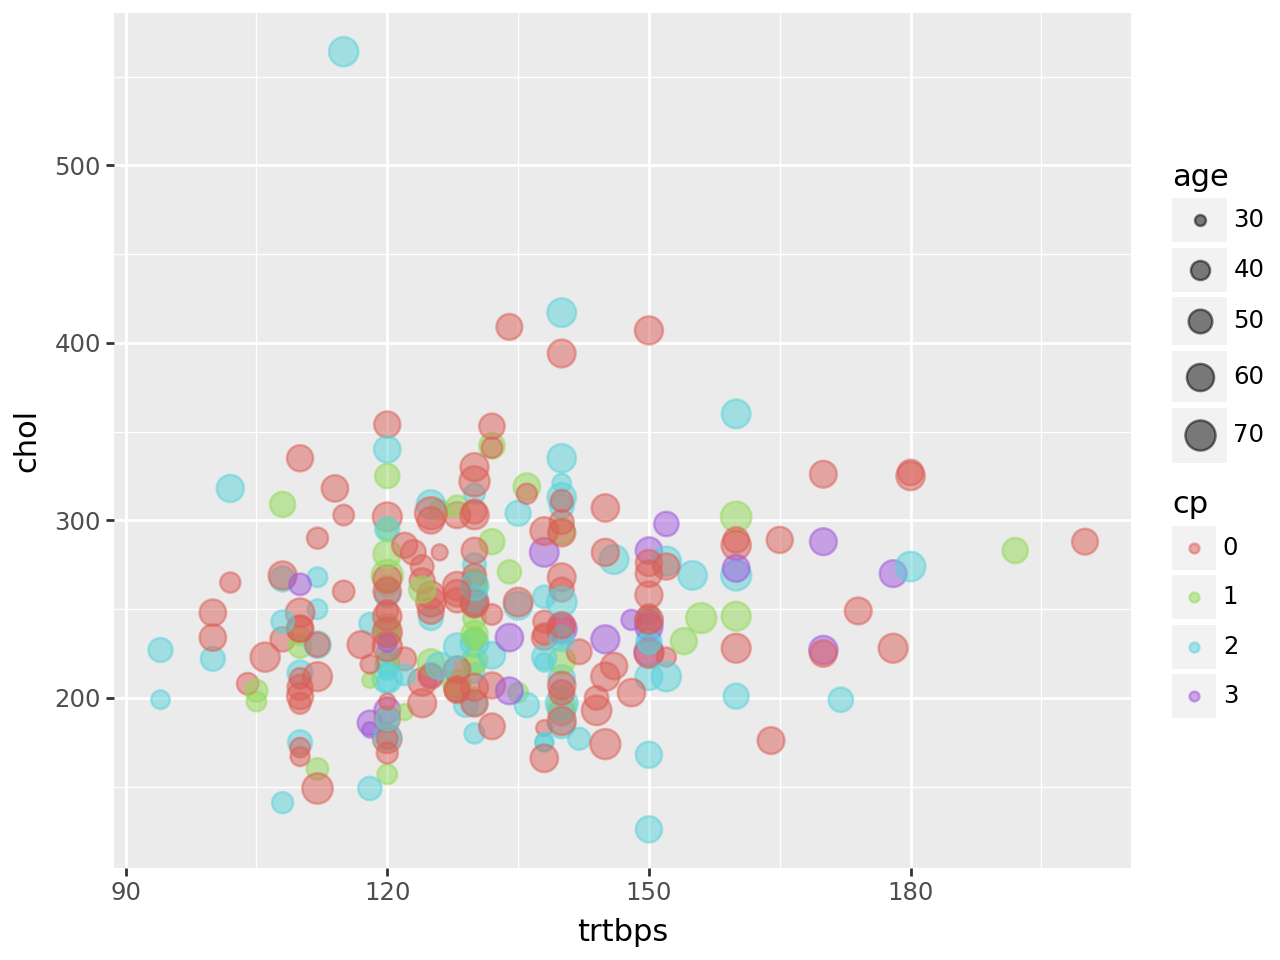

In [98]:
(ggplot(ha, aes(x="trtbps", y="chol", size = "age", color="cp"))
+ geom_point(alpha = 0.5))

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [99]:
#KNN
X = ha[["trtbps", "chol", "age"]]
y = ha["cp"]


knn_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))]
)

knn_model.fit(X, y)


Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [100]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_model, X, y,
                            cv=5, scoring="accuracy")
cv_scores.mean()

np.float64(0.39191919191919194)

In [101]:
cross_val_score(knn_model, X, y,
                            cv=5, scoring="f1_macro").mean()


np.float64(0.22881172431853275)

In [102]:
precision_cp0 = cross_val_score(knn_model, X, ha["cp_is_0"],
                                  cv=5, scoring="precision").mean()

recall_cp0 = cross_val_score(knn_model, X, ha["cp_is_0"],
                               cv=5, scoring="recall").mean()

f1score_cp0 = cross_val_score(knn_model, X, ha["cp_is_0"],
                                cv=5, scoring="f1").mean()

precision_cp0, recall_cp0, f1score_cp0

(np.float64(0.4533333333333333),
 np.float64(0.42276923076923073),
 np.float64(0.4347488224689628))

In [103]:
precision_cp1 = cross_val_score(knn_model, X, ha["cp_is_1"],
                                  cv=5, scoring="precision").mean()

recall_cp1 = cross_val_score(knn_model, X, ha["cp_is_1"],
                               cv=5, scoring="recall").mean()

f1score_cp1 = cross_val_score(knn_model, X, ha["cp_is_1"],
                                cv=5, scoring="f1").mean()

precision_cp1, recall_cp1, f1score_cp1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


(np.float64(0.23333333333333334),
 np.float64(0.04444444444444444),
 np.float64(0.06666666666666668))

In [104]:
cross_val_score(knn_model, X, ha["cp_is_1"],
                                  cv=5, scoring="precision")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


array([1.        , 0.        , 0.16666667, 0.        , 0.        ])

In [105]:
cross_val_score(knn_model, X, ha["cp_is_1"],
                               cv=5, scoring="recall")

array([0.11111111, 0.        , 0.11111111, 0.        , 0.        ])

In [106]:
precision_cp2 = cross_val_score(knn_model, X, ha["cp_is_2"],
                                  cv=5, scoring="precision").mean()

recall_cp2 = cross_val_score(knn_model, X, ha["cp_is_2"],
                               cv=5, scoring="recall").mean()

f1score_cp2 = cross_val_score(knn_model, X, ha["cp_is_2"],
                                cv=5, scoring="f1").mean()

precision_cp2, recall_cp2, f1score_cp2

(np.float64(0.1261904761904762),
 np.float64(0.0985294117647059),
 np.float64(0.11044334975369459))

In [107]:
precision_cp3 = cross_val_score(knn_model, X, ha["cp_is_3"],
                                  cv=5, scoring="precision").mean()

recall_cp3 = cross_val_score(knn_model, X, ha["cp_is_3"],
                               cv=5, scoring="recall").mean()

f1score_cp3 = cross_val_score(knn_model, X, ha["cp_is_3"],
                                cv=5, scoring="f1").mean()

precision_cp3, recall_cp3, f1score_cp3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


(np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [108]:
#LDA
#completing code
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearDiscriminantAnalysis())
])

lda_model.fit(X, y)
cv_scores_lda = cross_val_score(lda_model, X, y, cv=5, scoring="accuracy")

lda_model

Pipeline(steps=[('scale', StandardScaler()),
                ('model', LinearDiscriminantAnalysis())])

In [109]:
#decision tree
dt_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth=2))]
)

dt_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2))])

[Text(0.5, 0.8333333333333334, 'age <= -0.311\ngini = 0.661\nsamples = 273\nvalue = [128, 44, 81, 20]'),
 Text(0.25, 0.5, 'trtbps <= 0.193\ngini = 0.679\nsamples = 95\nvalue = [32, 20, 38, 5]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.692\nsamples = 73\nvalue = [21, 20, 28, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.541\nsamples = 22\nvalue = [11, 0, 10, 1]'),
 Text(0.75, 0.5, 'trtbps <= 0.051\ngini = 0.625\nsamples = 178\nvalue = [96, 24, 43, 15]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.558\nsamples = 90\nvalue = [55.0, 15.0, 18.0, 2.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.67\nsamples = 88\nvalue = [41.0, 9.0, 25.0, 13.0]')]

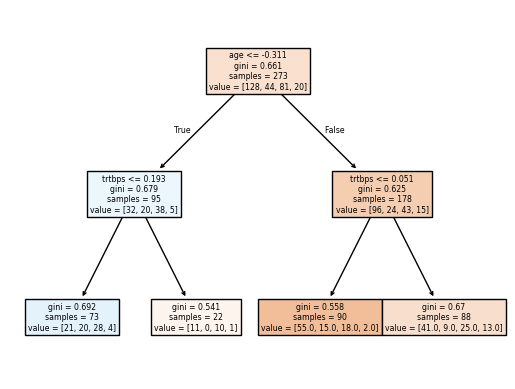

In [110]:
from sklearn.tree import plot_tree

plot_tree(dt_model.named_steps["model"], feature_names=["trtbps", "chol", "age"], filled=True)

In [111]:
#completing code
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring="accuracy")
cv_scores_dt

array([0.38181818, 0.41818182, 0.50909091, 0.46296296, 0.44444444])

Answering last part of the question: Interpreation of decision tree:

The first few splits:
First split trtbps <= 0.728
Second split left age <= -2.508
Second split right chol <= -0.491

The decision tree first split looks at blood pressure to separate patients and if someone has lower blood pressure, the tree then checks their age. If someone has higher blood pressure, the tree checks their cholesterol level. This shows that blood pressure followed by these other variables are very important in deciding what kind of chest pain a patient has.

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [112]:
#Create a new column in the ha dataset called cp_is_3, which is equal to 1 if the cp variable is equal to 3 and 0 otherwise.

X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_3"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X, y)


Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [113]:
cross_val_score(logistic_model, X, y,
                                  cv=5, scoring="precision").mean()



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/

np.float64(0.0)

In [114]:
cross_val_score(logistic_model, X, y,
                               cv=5, scoring="recall").mean()

np.float64(0.0)

In [115]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="f1").mean()

np.float64(0.0)

In [116]:
#Then, fit a Logistic Regression to predict this new target, and report the F1 Score.

X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_0"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X, y)


Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [117]:
cross_val_score(logistic_model, X, y,
                                  cv=5, scoring="precision").mean()


np.float64(0.5402229712211564)

In [118]:
cross_val_score(logistic_model, X, y,
                               cv=5, scoring="recall").mean()


np.float64(0.4144615384615385)

In [119]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="f1").mean()

np.float64(0.4624250522492891)

In [120]:
#completing code

#fitting to other remaining categories

#for is 1
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_1"]
logistic_model = Pipeline([("scale", StandardScaler()), ("model", LogisticRegression())])
logistic_model.fit(X, y)
f1_cp1 = cross_val_score(logistic_model, X, y, cv=5, scoring="f1").mean()

#for is 2
y = ha["cp_is_2"]
logistic_model.fit(X, y)
f1_cp2 = cross_val_score(logistic_model, X, y, cv=5, scoring="f1").mean()

In [121]:
#best category

f1_scores = {'cp_0': 0.462, 'cp_1': f1_cp1, 'cp_2': f1_cp2, 'cp_3': 0.0}
best_ovr = max(f1_scores, key=f1_scores.get)
best_ovr

'cp_0'

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [122]:
#Reduce your dataset to only the 0 and 1 types of chest pain.

ha_01 = ha[(ha["cp"] == "0") | (ha["cp"] == "1")]

X = ha_01[["trtbps", "chol", "age"]]
y = ha_01["cp"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [123]:
#Then, fit a Logistic Regression to predict between the two groups, and report the ROC-AUC.
#^also see above for parts of this
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="roc_auc").mean()

np.float64(0.6016623931623932)

In [124]:
#completing code

#Repeat comparing category 0 to 2 and 3.

#0 vs 2
ha_02 = ha[(ha["cp"] == "0") | (ha["cp"] == "2")]
X = ha_02[["trtbps", "chol", "age"]]
y = ha_02["cp"]
logistic_model.fit(X, y)
roc_auc_02 = cross_val_score(logistic_model, X, y, cv=5, scoring="roc_auc").mean()

#0 vs 3
ha_03 = ha[(ha["cp"] == "0") | (ha["cp"] == "3")]
X = ha_03[["trtbps", "chol", "age"]]
y = ha_03["cp"]
logistic_model.fit(X, y)
roc_auc_03 = cross_val_score(logistic_model, X, y, cv=5, scoring="roc_auc").mean()



In [125]:
#Which pair was the OvO approach best at distinguishing?
#best pair
roc_scores = {'0_vs_1': 0.602, '0_vs_2': roc_auc_02, '0_vs_3': roc_auc_03}
best_ovo = max(roc_scores, key=roc_scores.get)
best_ovo

'0_vs_1'